<a href="https://colab.research.google.com/github/djsmacker01/House-Price-Prediction/blob/main/Copy_of_Nurudeen_Adedeji_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""from google.colab import files
train = files.upload()"""


Saving train.csv to train (1).csv


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New section

In [117]:
import numpy as np #linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # Import the necessary function
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.feature_selection import chi2



In [3]:
# import io
# data = pd.read_csv(io.BytesIO(train['train.csv']))
df= pd.read_csv("/content/drive/MyDrive/train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
#list out all the columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
missing_val = df.isnull().sum()
missing_val

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
missing_values_sorted = missing_val.sort_values(ascending=False)

print("Columns with the most missing values:")
print(missing_values_sorted.head(60))

Columns with the most missing values:
PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition   

In [7]:
df = df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])

In [8]:
#Separate numercial and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [9]:
print(categorical_cols)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [10]:
print(numerical_cols)


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [11]:
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
#imputer for numerical data (using Median)
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [13]:
#imputer for categorical data (using most frequent value)
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

In [14]:
#verify there are no more missing values
missing_val = df.isnull().sum()
missing_val

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [15]:
missing_values_sorted = missing_val.sort_values(ascending=False)

print("Columns with the most missing values:")
print(missing_values_sorted.head(60))

Columns with the most missing values:
Id               0
HalfBath         0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
FullBath         0
HeatingQC        0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
CentralAir       0
Heating          0
MSSubClass       0
LandSlope        0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LotConfig        0
TotalBsmtSF      0
Utilities   

In [16]:
num_cols = len(categorical_cols)
print(num_cols)

39


In [17]:
num_rows = (num_cols + 2) // 3
print(num_rows)

13


In [18]:
#Let's move to the next stage, which is EDA,
#Let' start with automatically drawing graphs from all categorical

num_cols = len(categorical_cols)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed
plt.figure(figsize=(20,15))
plt.suptitle('Categorical Features', fontsize=20)
for i in range(0, len(categorical_cols)):
    plt.subplot(num_rows, 3, i+1)
    sns.countplot(x=categorical_cols[i], data=df)
    plt.tight_layout()

In [ ]:
#Let's move to the next stage, which is EDA,
#Let' start with automatically drawing graphs from all numerical
plt.figure(figsize=(20,15))
plt.suptitle('Distribution of Numerical Columns', fontsize=20)

for i, col in enumerate(numerical_cols, 1):
  plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
  sns.distplot(df[col])
  plt.title(col)
  plt.xlabel('')
  plt.ylabel('')

plt.tight_layout(rect=[0,0,1, 0.96])
plt.show()

<ipython-input-21-5c9d516a5073>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-21-5c9d516a5073>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-21-5c9d516a5073>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

In [19]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

# Encode categorical features using one-hot encoding or label encoding

In [20]:
# Assuming 'categorical_cols' is a list of column names, try this:
# df[categorical_cols].value_counts()

# Perform one-hot encoding
# df = pd.get_dummies(df, columns=categorical_cols)
# df = pd.get_dummies(df, columns=categorical_cols, dtype=int)
one_hot_encoded = pd.get_dummies(df[categorical_cols], dtype=int)

print(one_hot_encoded)

# print(df.head)

      MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                    0            0            0            1            0   
1                    0            0            0            1            0   
2                    0            0            0            1            0   
3                    0            0            0            1            0   
4                    0            0            0            1            0   
...                ...          ...          ...          ...          ...   
1455                 0            0            0            1            0   
1456                 0            0            0            1            0   
1457                 0            0            0            1            0   
1458                 0            0            0            1            0   
1459                 0            0            0            1            0   

      Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  Lot

In [21]:

#combining numerical columns and one-hot encoded columns(categorical columns)
final_df =pd.concat([df[numerical_cols], one_hot_encoded], axis=1)
print(final_df)

          Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1.0        60.0         65.0   8450.0          7.0          5.0   
1        2.0        20.0         80.0   9600.0          6.0          8.0   
2        3.0        60.0         68.0  11250.0          7.0          5.0   
3        4.0        70.0         60.0   9550.0          7.0          5.0   
4        5.0        60.0         84.0  14260.0          8.0          5.0   
...      ...         ...          ...      ...          ...          ...   
1455  1456.0        60.0         62.0   7917.0          6.0          5.0   
1456  1457.0        20.0         85.0  13175.0          6.0          6.0   
1457  1458.0        70.0         66.0   9042.0          7.0          9.0   
1458  1459.0        20.0         68.0   9717.0          5.0          6.0   
1459  1460.0        20.0         75.0   9937.0          5.0          6.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  \
0        

In [22]:
# Encoding categorical features
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[categorical_cols])

In [23]:
print(df.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSol

Handle Outliers
> Identify and hanle outliers in numerical features

In [24]:
# df.select_dtypes(include=['object']).columns
#checking out outliers in our numerical columns
df.dtypes[df.dtypes != 'object']


Id               float64
MSSubClass       float64
LotFrontage      float64
LotArea          float64
OverallQual      float64
OverallCond      float64
YearBuilt        float64
YearRemodAdd     float64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF         float64
2ndFlrSF         float64
LowQualFinSF     float64
GrLivArea        float64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath         float64
HalfBath         float64
BedroomAbvGr     float64
KitchenAbvGr     float64
TotRmsAbvGrd     float64
Fireplaces       float64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF       float64
OpenPorchSF      float64
EnclosedPorch    float64
3SsnPorch        float64
ScreenPorch      float64
PoolArea         float64
MiscVal          float64
MoSold           float64
YrSold           float64
SalePrice        float64
dtype: object

In [25]:
# Detecting outliers
plt.scatter(x='MSSubClass', y='SalePrice', data=df)

In [26]:
plt.scatter(x='LotFrontage', y='SalePrice', data=df)

In [27]:
df.query('LotFrontage > 300')
#Then drop id 935 and 1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
934    935.0        20.0       RL        313.0  27650.0   Pave      IR2   
1298  1299.0        60.0       RL        313.0  63887.0   Pave      IR3   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
934          HLS    AllPub    Inside  ...           0.0       0.0         0.0   
1298         Bnk    AllPub    Corner  ...           0.0       0.0         0.0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
934       0.0     0.0   11.0  2008.0        WD         Normal   242000.0  
1298    480.0     0.0    1.0  2008.0       New        Partial   160000.0  

[2 rows x 77 columns]

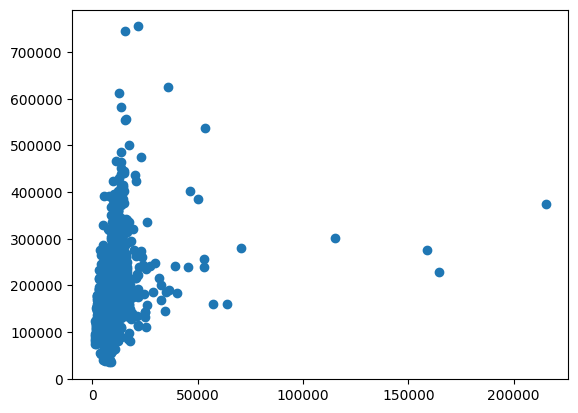

In [28]:
plt.scatter(x='LotArea', y='SalePrice', data=df)

In [29]:
df.query('LotArea > 60000')
#then i need to drop 250,314,336 and 707

Id  MSSubClass MSZoning  LotFrontage   LotArea Street LotShape  \
249    250.0        50.0       RL         69.0  159000.0   Pave      IR2   
313    314.0        20.0       RL        150.0  215245.0   Pave      IR3   
335    336.0       190.0       RL         69.0  164660.0   Grvl      IR1   
451    452.0        20.0       RL         62.0   70761.0   Pave      IR1   
706    707.0        20.0       RL         69.0  115149.0   Pave      IR2   
1298  1299.0        60.0       RL        313.0   63887.0   Pave      IR3   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
249          Low    AllPub   CulDSac  ...           0.0       0.0         0.0   
313          Low    AllPub    Inside  ...           0.0       0.0         0.0   
335          HLS    AllPub    Corner  ...           0.0       0.0         0.0   
451          Low    AllPub    Inside  ...           0.0       0.0         0.0   
706          Low    AllPub   CulDSac  ...           0.0       0.0         0.0   
1298         Bnk    AllPub    Corner  ...           0.0       0.0         0.0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
249       0.0   500.0    6.0  2007.0        WD         Normal   277000.0  
313       0.0     0.0    6.0  2009.0        WD         Normal   375000.0  
335       0.0   700.0    8.0  2008.0        WD         Normal   228950.0  
451       0.0     0.0   12.0  2006.0        WD         Normal   280000.0  
706       0.0     0.0    6.0  2007.0        WD         Normal   302000.0  
1298    480.0     0.0    1.0  2008.0       New        Partial   160000.0  

[6 rows x 77 columns]

In [30]:
stats.zscore(df['LotArea']).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

In [31]:
plt.scatter(x='OverallQual', y='SalePrice', data=df)

In [32]:
df.query('OverallQual == 10')
#we can drop 524 and 1299 cos the house price falls

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
58      59.0        60.0       RL         66.0  13682.0   Pave      IR2   
185    186.0        75.0       RM         90.0  22950.0   Pave      IR2   
224    225.0        20.0       RL        103.0  13472.0   Pave      Reg   
389    390.0        60.0       RL         96.0  12474.0   Pave      Reg   
440    441.0        20.0       RL        105.0  15431.0   Pave      Reg   
515    516.0        20.0       RL         94.0  12220.0   Pave      Reg   
523    524.0        60.0       RL        130.0  40094.0   Pave      IR1   
583    584.0        75.0       RM         75.0  13500.0   Pave      Reg   
591    592.0        60.0       RL         97.0  13478.0   Pave      IR1   
691    692.0        60.0       RL        104.0  21535.0   Pave      IR1   
825    826.0        20.0       RL        114.0  14803.0   Pave      Reg   
994    995.0        20.0       RL         96.0  12456.0   Pave      Reg   
1169  1170.0        60.0       RL        118.0  35760.0   Pave      IR1   
1182  1183.0        60.0       RL        160.0  15623.0   Pave      IR1   
1243  1244.0        20.0       RL        107.0  13891.0   Pave      Reg   
1298  1299.0        60.0       RL        313.0  63887.0   Pave      IR3   
1373  1374.0        20.0       RL         69.0  11400.0   Pave      Reg   
1442  1443.0        60.0       FV         85.0  11003.0   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
58           HLS    AllPub   CulDSac  ...          37.0       0.0         0.0   
185          Lvl    AllPub    Inside  ...           0.0       0.0       410.0   
224          Lvl    AllPub    Inside  ...           0.0       0.0         0.0   
389          Lvl    AllPub    Inside  ...           0.0       0.0         0.0   
440          Lvl    AllPub    Inside  ...           0.0       0.0       170.0   
515          Lvl    AllPub    Inside  ...           0.0       0.0         0.0   
523          Bnk    AllPub    Inside  ...           0.0       0.0         0.0   
583          Lvl    AllPub    Inside  ...           0.0       0.0         0.0   
591          Lvl    AllPub    Corner  ...           0.0       0.0         0.0   
691          Lvl    AllPub    Corner  ...           0.0       0.0         0.0   
825          Lvl    AllPub    Inside  ...           0.0       0.0         0.0   
994          Lvl    AllPub       FR2  ...           0.0       0.0         0.0   
1169         Lvl    AllPub   CulDSac  ...           0.0       0.0         0.0   
1182         Lvl    AllPub    Corner  ...           0.0       0.0         0.0   
1243         Lvl    AllPub    Inside  ...           0.0       0.0         0.0   
1298         Bnk    AllPub    Corner  ...           0.0       0.0         0.0   
1373         Lvl    AllPub    Inside  ...           0.0       0.0         0.0   
1442         Lvl    AllPub    Inside  ...           0.0       0.0         0.0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
58        0.0     0.0   10.0  2006.0       New        Partial   438780.0  
185       0.0     0.0    6.0  2006.0        WD         Normal   475000.0  
224       0.0     0.0    6.0  2009.0        WD         Normal   386250.0  
389       0.0     0.0    8.0  2008.0       New        Partial   426000.0  
440       0.0     0.0    4.0  2009.0        WD         Normal   555000.0  
515       0.0     0.0    9.0  2009.0       New        Partial   402861.0  
523       0.0     0.0   10.0  2007.0       New        Partial   184750.0  
583       0.0     0.0    7.0  2008.0        WD         Normal   325000.0  
591       0.0     0.0    6.0  2009.0     ConLI         Normal   451950.0  
691       0.0     0.0    1.0  2007.0        WD         Normal   755000.0  
825       0.0     0.0    6.0  2008.0       New        Partial   385000.0  
994       0.0     0.0    7.0  2009.0        WD         Normal   337500.0  
1169      0.0     0.0    7.0  2006.0        WD         Normal   62500

In [33]:
stats.zscore(df['OverallQual']).sort_values().tail(10)

591     2.821425
583     2.821425
1373    2.821425
1182    2.821425
825     2.821425
1169    2.821425
523     2.821425
515     2.821425
1442    2.821425
1298    2.821425
Name: OverallQual, dtype: float64

I think OverallQuall is cool, i need to drop any id

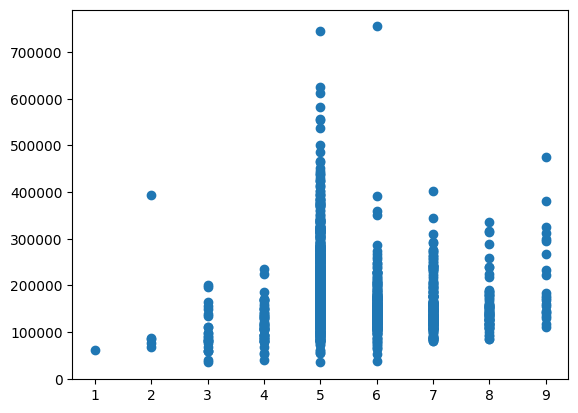

In [34]:
plt.scatter(x='OverallCond', y='SalePrice', data=df)

In [35]:
df.query('OverallCond == 2 & SalePrice > 300000')
#then we drop 379

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
378  379.0        20.0       RL         88.0  11394.0   Pave      Reg   

    LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
378         Lvl    AllPub    Corner  ...           0.0       0.0         0.0   

    PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
378      0.0     0.0    6.0  2010.0       New        Partial   394432.0  

[1 rows x 77 columns]

In [36]:
stats.zscore(df['OverallCond']).sort_values().tail(10)

241     3.07857
191     3.07857
980     3.07857
991     3.07857
1327    3.07857
703     3.07857
461     3.07857
1435    3.07857
508     3.07857
185     3.07857
Name: OverallCond, dtype: float64

In [37]:
df.query('OverallCond == 5 & SalePrice > 700000')
# I might need to drop 1183

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1182  1183.0        60.0       RL        160.0  15623.0   Pave      IR1   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
1182         Lvl    AllPub    Corner  ...           0.0       0.0         0.0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
1182    555.0     0.0    7.0  2007.0        WD        Abnorml   745000.0  

[1 rows x 77 columns]

In [38]:
df.query('OverallCond == 6 & SalePrice > 700000')
# I might need to drop 692

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
691  692.0        60.0       RL        104.0  21535.0   Pave      IR1   

    LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
691         Lvl    AllPub    Corner  ...           0.0       0.0         0.0   

    PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
691      0.0     0.0    1.0  2007.0        WD         Normal   755000.0  

[1 rows x 77 columns]

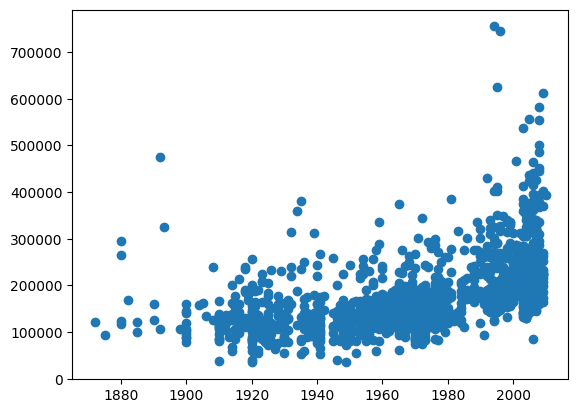

In [39]:
plt.scatter(x='YearBuilt', y='SalePrice', data=df)

In [40]:
df.query('YearBuilt < 1900 & SalePrice > 380000')
#drop 186

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
185  186.0        75.0       RM         90.0  22950.0   Pave      IR2   

    LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
185         Lvl    AllPub    Inside  ...           0.0       0.0       410.0   

    PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
185      0.0     0.0    6.0  2006.0        WD         Normal   475000.0  

[1 rows x 77 columns]

In [41]:
df.query('YearBuilt < 2000 & SalePrice > 700000')
# i might need to drop 692 and 1183

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
691    692.0        60.0       RL        104.0  21535.0   Pave      IR1   
1182  1183.0        60.0       RL        160.0  15623.0   Pave      IR1   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
691          Lvl    AllPub    Corner  ...           0.0       0.0         0.0   
1182         Lvl    AllPub    Corner  ...           0.0       0.0         0.0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
691       0.0     0.0    1.0  2007.0        WD         Normal   755000.0  
1182    555.0     0.0    7.0  2007.0        WD        Abnorml   745000.0  

[2 rows x 77 columns]

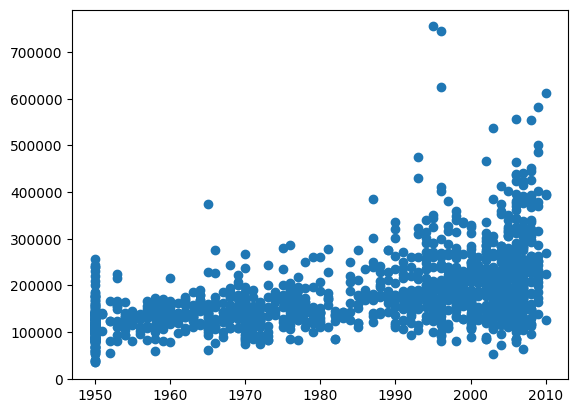

In [42]:
plt.scatter(x='YearRemodAdd', y='SalePrice', data=df)

In [43]:
df.query('YearRemodAdd < 1970 & SalePrice > 300000')
#drop 314

Id  MSSubClass MSZoning  LotFrontage   LotArea Street LotShape  \
313  314.0        20.0       RL        150.0  215245.0   Pave      IR3   

    LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
313         Low    AllPub    Inside  ...           0.0       0.0         0.0   

    PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
313      0.0     0.0    6.0  2009.0        WD         Normal   375000.0  

[1 rows x 77 columns]

In [44]:
df.query('YearRemodAdd < 2000 & SalePrice > 700000')
#drop 692 and 1183

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
691    692.0        60.0       RL        104.0  21535.0   Pave      IR1   
1182  1183.0        60.0       RL        160.0  15623.0   Pave      IR1   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
691          Lvl    AllPub    Corner  ...           0.0       0.0         0.0   
1182         Lvl    AllPub    Corner  ...           0.0       0.0         0.0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
691       0.0     0.0    1.0  2007.0        WD         Normal   755000.0  
1182    555.0     0.0    7.0  2007.0        WD        Abnorml   745000.0  

[2 rows x 77 columns]

In [45]:
plt.scatter(x='MasVnrArea', y='SalePrice', data=df)

In [46]:
df.query('MasVnrArea > 1500 ')
#drop 298

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
297  298.0        60.0       FV         66.0   7399.0   Pave      IR1   

    LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
297         Lvl    AllPub    Inside  ...           0.0       0.0       198.0   

    PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
297      0.0     0.0    6.0  2007.0        WD         Normal   239000.0  

[1 rows x 77 columns]

In [47]:
df.query('MasVnrArea < 200 & SalePrice > 550000')
#drop 1183

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1182  1183.0        60.0       RL        160.0  15623.0   Pave      IR1   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
1182         Lvl    AllPub    Corner  ...           0.0       0.0         0.0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
1182    555.0     0.0    7.0  2007.0        WD        Abnorml   745000.0  

[1 rows x 77 columns]

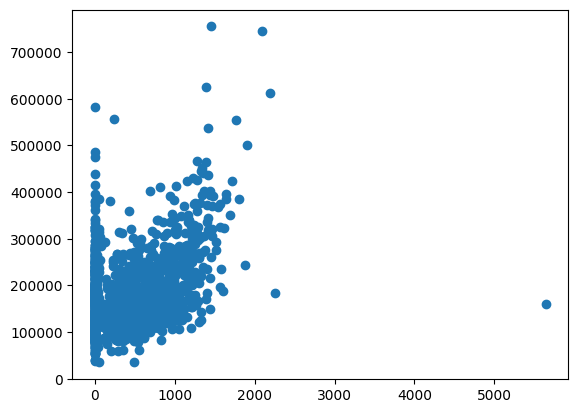

In [48]:
plt.scatter(x='BsmtFinSF1', y='SalePrice', data=df)

In [49]:
df.query('BsmtFinSF1 > 5000')
#drop 1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1298  1299.0        60.0       RL        313.0  63887.0   Pave      IR3   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
1298         Bnk    AllPub    Corner  ...           0.0       0.0         0.0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
1298    480.0     0.0    1.0  2008.0       New        Partial   160000.0  

[1 rows x 77 columns]

In [50]:
df.query('BsmtFinSF1 < 3000 & SalePrice > 700000')
#drop 692 and 1183

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
691    692.0        60.0       RL        104.0  21535.0   Pave      IR1   
1182  1183.0        60.0       RL        160.0  15623.0   Pave      IR1   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
691          Lvl    AllPub    Corner  ...           0.0       0.0         0.0   
1182         Lvl    AllPub    Corner  ...           0.0       0.0         0.0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
691       0.0     0.0    1.0  2007.0        WD         Normal   755000.0  
1182    555.0     0.0    7.0  2007.0        WD        Abnorml   745000.0  

[2 rows x 77 columns]

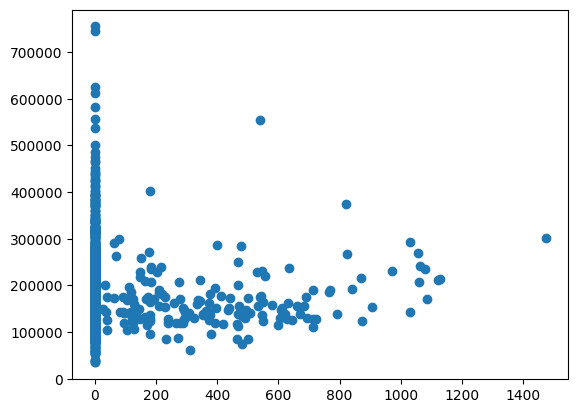

In [51]:
plt.scatter(x='BsmtFinSF2', y='SalePrice', data=df)

In [52]:
df.query('BsmtFinSF2 > 400 & SalePrice > 500000')
#drop 441

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
440  441.0        20.0       RL        105.0  15431.0   Pave      Reg   

    LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
440         Lvl    AllPub    Inside  ...           0.0       0.0       170.0   

    PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
440      0.0     0.0    4.0  2009.0        WD         Normal   555000.0  

[1 rows x 77 columns]

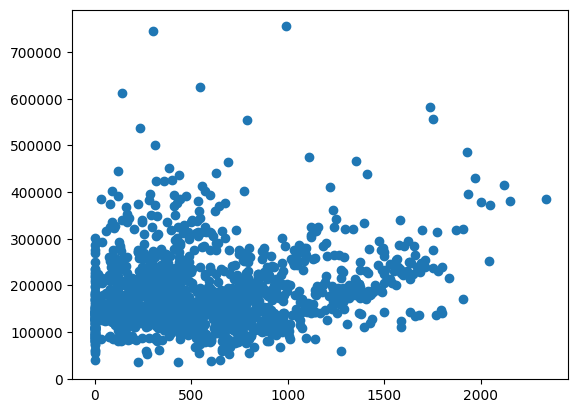

In [53]:
plt.scatter(x='BsmtUnfSF', y='SalePrice', data=df)

In [54]:
df.query('BsmtUnfSF > 1500 & SalePrice > 650000')


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 77 columns]

In [55]:
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=df)

In [56]:
df.query('TotalBsmtSF > 5000')
#drop 1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1298  1299.0        60.0       RL        313.0  63887.0   Pave      IR3   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
1298         Bnk    AllPub    Corner  ...           0.0       0.0         0.0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
1298    480.0     0.0    1.0  2008.0       New        Partial   160000.0  

[1 rows x 77 columns]

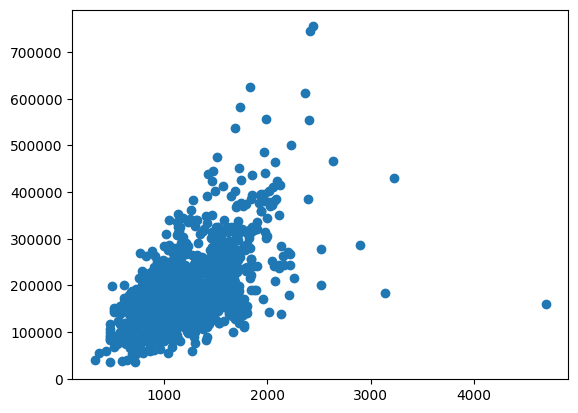

In [57]:
plt.scatter(x='1stFlrSF', y='SalePrice', data=df)

In [58]:
df.query('`1stFlrSF` > 4000')
#drop 1299


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1298  1299.0        60.0       RL        313.0  63887.0   Pave      IR3   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
1298         Bnk    AllPub    Corner  ...           0.0       0.0         0.0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
1298    480.0     0.0    1.0  2008.0       New        Partial   160000.0  

[1 rows x 77 columns]

In [ ]:
plt.scatter(x='2ndFlrSF', y = 'SalePrice', data=df)

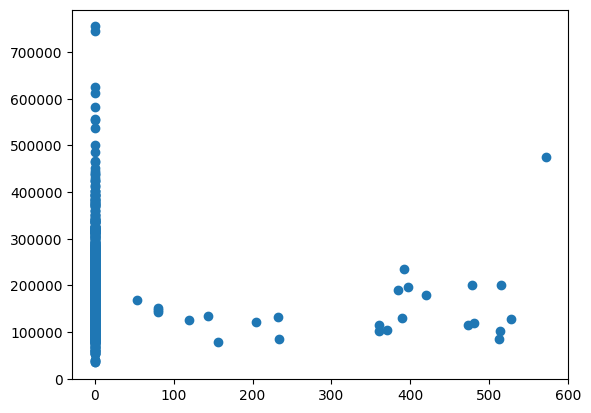

In [ ]:
plt.scatter(x='LowQualFinSF', y='SalePrice', data=df)
#drop

In [59]:
df.query('LowQualFinSF > 500 & SalePrice > 40000 ')
#drop 186

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
88      89.0        50.0  C (all)        105.0   8470.0   Pave      IR1   
170    171.0        50.0       RM         69.0  12358.0   Pave      IR1   
185    186.0        75.0       RM         90.0  22950.0   Pave      IR2   
635    636.0       190.0       RH         60.0  10896.0   Pave      Reg   
1009  1010.0        50.0       RL         60.0   6000.0   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
88           Lvl    AllPub    Corner  ...         156.0       0.0         0.0   
170          Lvl    AllPub    Inside  ...           0.0       0.0         0.0   
185          Lvl    AllPub    Inside  ...           0.0       0.0       410.0   
635          Bnk    AllPub    Inside  ...           0.0       0.0         0.0   
1009         Lvl    AllPub    Inside  ...         138.0       0.0         0.0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
88        0.0     0.0   10.0  2009.0     ConLD        Abnorml    85000.0  
170       0.0     0.0    5.0  2007.0        WD         Normal   128500.0  
185       0.0     0.0    6.0  2006.0        WD         Normal   475000.0  
635       0.0     0.0    3.0  2007.0        WD        Abnorml   200000.0  
1009      0.0     0.0    6.0  2006.0        WD         Normal   102000.0  

[5 rows x 77 columns]

In [ ]:
plt.scatter(x='GrLivArea', y='SalePrice', data=df)

In [60]:
df.query('GrLivArea > 4000')
#drop 524 and 1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
523    524.0        60.0       RL        130.0  40094.0   Pave      IR1   
691    692.0        60.0       RL        104.0  21535.0   Pave      IR1   
1182  1183.0        60.0       RL        160.0  15623.0   Pave      IR1   
1298  1299.0        60.0       RL        313.0  63887.0   Pave      IR3   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
523          Bnk    AllPub    Inside  ...           0.0       0.0         0.0   
691          Lvl    AllPub    Corner  ...           0.0       0.0         0.0   
1182         Lvl    AllPub    Corner  ...           0.0       0.0         0.0   
1298         Bnk    AllPub    Corner  ...           0.0       0.0         0.0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
523       0.0     0.0   10.0  2007.0       New        Partial   184750.0  
691       0.0     0.0    1.0  2007.0        WD         Normal   755000.0  
1182    555.0     0.0    7.0  2007.0        WD        Abnorml   745000.0  
1298    480.0     0.0    1.0  2008.0       New        Partial   160000.0  

[4 rows x 77 columns]

In [ ]:
plt.scatter(x='BsmtFullBath', y='SalePrice', data=df)

In [ ]:
df.query('BsmtFullBath > 2.5')
#drop 739

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
738  739.0        90.0       RL         60.0  10800.0   Pave      Reg   

    LandContour Utilities LotConfig  ... MiscVal MoSold  YrSold SaleType  \
738         Lvl    AllPub    Inside  ...     0.0    3.0  2009.0       WD   

    SaleCondition SalePrice  TotalSF  TotalBath  House  YearSinceRemodeled  
738        Alloca  179000.0   2400.0        6.0   22.0                21.0  

[1 rows x 81 columns]

In [ ]:
plt.scatter(x='BsmtHalfBath', y='SalePrice', data=df)

In [ ]:
stats.zscore(df['BsmtHalfBath']).sort_values().tail(20)

176     3.948809
931     3.948809
1276    3.948809
658     3.948809
414     3.948809
251     3.948809
330     3.948809
1389    3.948809
1118    3.948809
421     3.948809
245     3.948809
558     3.948809
1123    3.948809
1287    3.948809
426     3.948809
1006    3.948809
249     3.948809
358     3.948809
597     8.138680
954     8.138680
Name: BsmtHalfBath, dtype: float64

In [61]:
stats.zscore(df['BsmtHalfBath']).unique()

array([-0.24106104,  3.94880935,  8.13867973])

In [ ]:
df.query('BsmtHalfBath == 2')
#drop 598 and 955

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
597  598.0       120.0       RL         53.0   3922.0   Pave      Reg   
954  955.0        90.0       RL         35.0   9400.0   Pave      IR1   

    LandContour Utilities LotConfig  ... MiscVal MoSold  YrSold SaleType  \
597         Lvl    AllPub    Inside  ...     0.0    2.0  2007.0      New   
954         Lvl    AllPub   CulDSac  ...     0.0   10.0  2006.0       WD   

    SaleCondition SalePrice  TotalSF  TotalBath  House  YearSinceRemodeled  
597       Partial  194201.0   2660.0        2.0    1.0                 0.0  
954       AdjLand  127500.0   1925.0        3.0   31.0                31.0  

[2 rows x 81 columns]

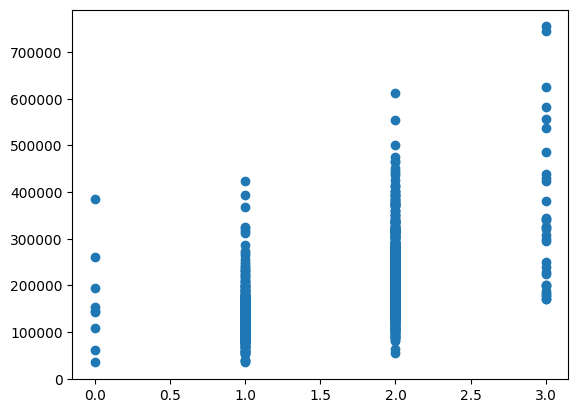

In [ ]:
plt.scatter(x='FullBath', y='SalePrice', data=df)

In [ ]:
plt.scatter(x='HalfBath', y='SalePrice', data=df)

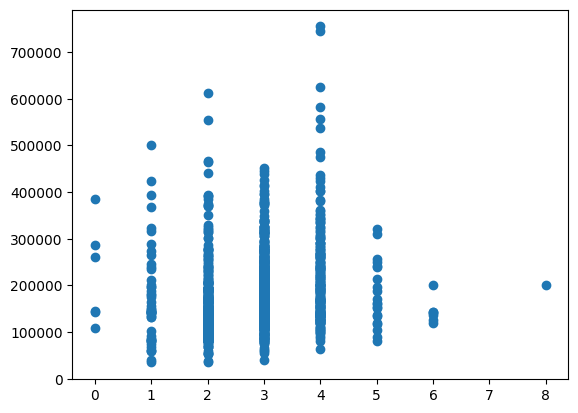

In [ ]:
plt.scatter(x='BedroomAbvGr', y='SalePrice', data=df)

In [ ]:
df.query('BedroomAbvGr > 7')
#drop 1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
635  636.0       190.0       RH         60.0  10896.0   Pave      Reg   

    LandContour Utilities LotConfig  ... MiscVal MoSold  YrSold SaleType  \
635         Bnk    AllPub    Inside  ...     0.0    3.0  2007.0       WD   

    SaleCondition SalePrice  TotalSF  TotalBath  House  YearSinceRemodeled  
635       Abnorml  200000.0   4320.0        2.0   93.0                12.0  

[1 rows x 81 columns]

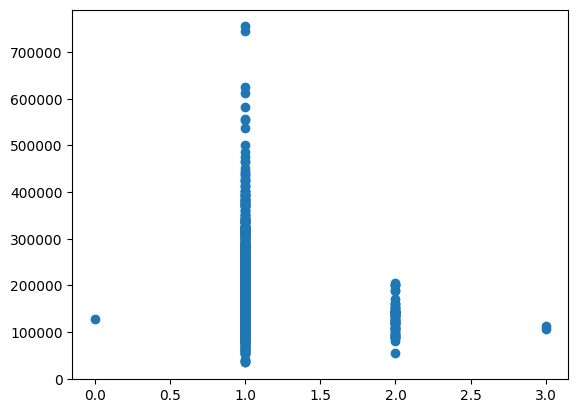

In [ ]:
plt.scatter(x='KitchenAbvGr', y='SalePrice', data=df)

In [ ]:
df.query('KitchenAbvGr == 3')
#drop 49, 810

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
48    49.0       190.0       RM         33.0   4456.0   Pave      Reg   
809  810.0        75.0       RM         90.0   8100.0   Pave      Reg   

    LandContour Utilities LotConfig  ... MiscVal MoSold  YrSold SaleType  \
48          Lvl    AllPub    Inside  ...     0.0    6.0  2009.0      New   
809         Lvl    AllPub    Corner  ...     0.0   11.0  2009.0       WD   

    SaleCondition SalePrice  TotalSF  TotalBath  House  YearSinceRemodeled  
48        Partial  113000.0   2188.0        2.0   89.0                 1.0  
809        Normal  106000.0   2987.0        2.0  111.0                44.0  

[2 rows x 81 columns]

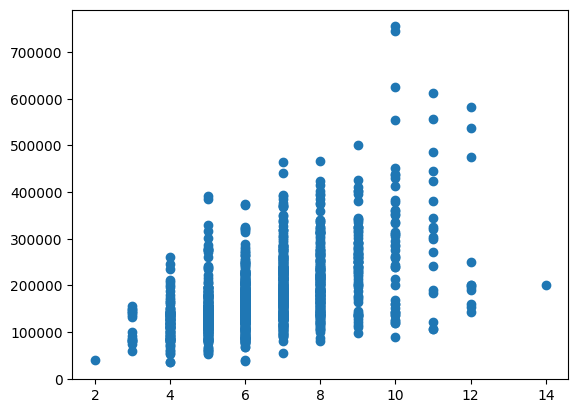

In [ ]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=df)

In [ ]:
df.query('TotRmsAbvGrd == 14')
#drop 636

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
635  636.0       190.0       RH         60.0  10896.0   Pave      Reg   

    LandContour Utilities LotConfig  ... MiscVal MoSold  YrSold SaleType  \
635         Bnk    AllPub    Inside  ...     0.0    3.0  2007.0       WD   

    SaleCondition SalePrice  TotalSF  TotalBath  House  YearSinceRemodeled  
635       Abnorml  200000.0   4320.0        2.0   93.0                12.0  

[1 rows x 81 columns]

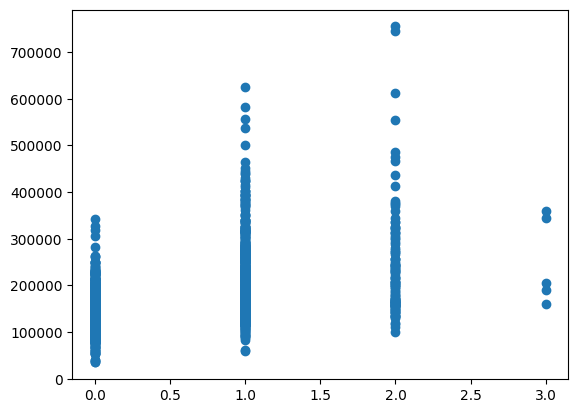

In [ ]:
plt.scatter(x='Fireplaces', y='SalePrice', data=df)

In [ ]:
df.query('Fireplaces == 3')
#drop 167, 310, 606, 643, 1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
166    167.0        20.0       RL         69.0  10708.0   Pave      IR1   
309    310.0        20.0       RL         90.0  12378.0   Pave      IR1   
605    606.0        60.0       RL         85.0  13600.0   Pave      Reg   
642    643.0        80.0       RL         75.0  13860.0   Pave      Reg   
1298  1299.0        60.0       RL        313.0  63887.0   Pave      IR3   

     LandContour Utilities LotConfig  ... MiscVal MoSold  YrSold SaleType  \
166          Lvl    AllPub    Inside  ...     0.0   11.0  2009.0      COD   
309          Lvl    AllPub    Inside  ...     0.0   11.0  2006.0       WD   
605          Lvl    AllPub    Inside  ...     0.0   10.0  2009.0       WD   
642          Lvl    AllPub    Inside  ...     0.0    7.0  2009.0       WD   
1298         Bnk    AllPub    Corner  ...     0.0    1.0  2008.0      New   

     SaleCondition SalePrice  TotalSF  TotalBath  House  YearSinceRemodeled  
166         Normal  190000.0   3484.0        2.0   54.0                16.0  
309         Normal  360000.0   3840.0        3.0    3.0                 2.0  
605         Normal  205000.0   2754.0        2.5   44.0                19.0  
642         Normal  345000.0   4656.0        3.5   37.0                14.0  
1298       Partial  160000.0  11752.0        4.5    0.0                 0.0  

[5 rows x 81 columns]

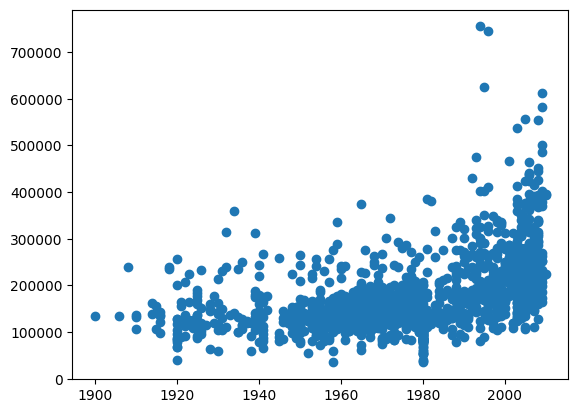

In [ ]:
plt.scatter(x='GarageYrBlt', y='SalePrice', data=df)

In [ ]:
plt.scatter(x='GarageCars', y='SalePrice', data=df)

In [ ]:
df.query('GarageCars == 4')
# I might need to drop 421, 748, 1191,1341,1351

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
420    421.0        90.0       RM         78.0   7060.0   Pave      Reg   
747    748.0        70.0       RM         65.0  11700.0   Pave      IR1   
1190  1191.0       190.0       RL         69.0  32463.0   Pave      Reg   
1340  1341.0        20.0       RL         70.0   8294.0   Pave      Reg   
1350  1351.0        90.0       RL         91.0  11643.0   Pave      Reg   

     LandContour Utilities LotConfig  ... MiscVal MoSold  YrSold SaleType  \
420          Lvl    AllPub    Inside  ...     0.0   11.0  2008.0       WD   
747          Lvl    AllPub    Corner  ...     0.0    5.0  2009.0       WD   
1190         Low    AllPub    Inside  ...     0.0    3.0  2007.0       WD   
1340         Lvl    AllPub    Inside  ...     0.0    6.0  2007.0       WD   
1350         Lvl    AllPub    Inside  ...     0.0    8.0  2009.0       WD   

     SaleCondition SalePrice  TotalSF  TotalBath  House  YearSinceRemodeled  
420         Alloca  206300.0   2688.0        4.0   11.0                10.0  
747         Normal  265979.0   3880.0        1.5  129.0                 6.0  
1190        Normal  168000.0   2871.0        2.0   46.0                32.0  
1340        Normal  123000.0   1730.0        1.0   36.0                36.0  
1350        Normal  200000.0   3882.0        4.5   40.0                40.0  

[5 rows x 81 columns]

In [ ]:
stats.zscore(df['GarageCars']).sort_values().tail(10)

231     1.650307
1243    1.650307
270     1.650307
1241    1.650307
272     1.650307
1340    2.988889
1190    2.988889
1350    2.988889
747     2.988889
420     2.988889
Name: GarageCars, dtype: float64

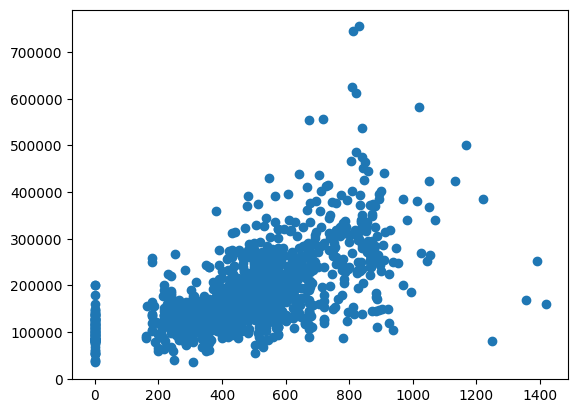

In [ ]:
plt.scatter(x='GarageArea', y='SalePrice', data=df)

In [ ]:
df.query('GarageArea > 1200')
#drop 1062, 1191

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
581    582.0        20.0       RL         98.0  12704.0   Pave      Reg   
825    826.0        20.0       RL        114.0  14803.0   Pave      Reg   
1061  1062.0        30.0  C (all)        120.0  18000.0   Grvl      Reg   
1190  1191.0       190.0       RL         69.0  32463.0   Pave      Reg   
1298  1299.0        60.0       RL        313.0  63887.0   Pave      IR3   

     LandContour Utilities LotConfig  ... MiscVal MoSold  YrSold SaleType  \
581          Lvl    AllPub    Inside  ...     0.0    8.0  2009.0      New   
825          Lvl    AllPub    Inside  ...     0.0    6.0  2008.0      New   
1061         Low    AllPub    Inside  ...   560.0    8.0  2008.0    ConLD   
1190         Low    AllPub    Inside  ...     0.0    3.0  2007.0       WD   
1298         Bnk    AllPub    Corner  ...     0.0    1.0  2008.0      New   

     SaleCondition SalePrice  TotalSF  TotalBath  House  YearSinceRemodeled  
581        Partial  253293.0   4084.0        2.5    1.0                 0.0  
825        Partial  385000.0   4162.0        3.0    1.0                 0.0  
1061        Normal   81000.0   1788.0        1.0   73.0                58.0  
1190        Normal  168000.0   2871.0        2.0   46.0                32.0  
1298       Partial  160000.0  11752.0        4.5    0.0                 0.0  

[5 rows x 81 columns]

In [ ]:
stats.zscore(df['GarageArea']).sort_values().tail(10)

1228    2.709098
270     2.713777
1417    2.788637
664     3.092757
178     3.242477
825     3.495131
1061    3.626136
1190    4.131443
581     4.290521
1298    4.421526
Name: GarageArea, dtype: float64

In [ ]:
plt.scatter(x='WoodDeckSF', y='SalePrice', data=df)

In [ ]:
df.query('WoodDeckSF > 800')
#drop 54

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
53  54.0        20.0       RL         68.0  50271.0   Pave      IR1   

   LandContour Utilities LotConfig  ... MiscVal MoSold  YrSold SaleType  \
53         Low    AllPub    Inside  ...     0.0   11.0  2006.0       WD   

   SaleCondition SalePrice  TotalSF  TotalBath  House  YearSinceRemodeled  
53        Normal  385000.0   3684.0        2.5   25.0                19.0  

[1 rows x 81 columns]

In [ ]:
stats.zscore(df['WoodDeckSF']).sort_values().tail(10)

961     3.637434
169     3.828981
64      3.844943
1423    3.924754
1210    4.315829
1313    4.579205
335     4.595168
1068    5.058072
1459    5.121921
53      6.087635
Name: WoodDeckSF, dtype: float64

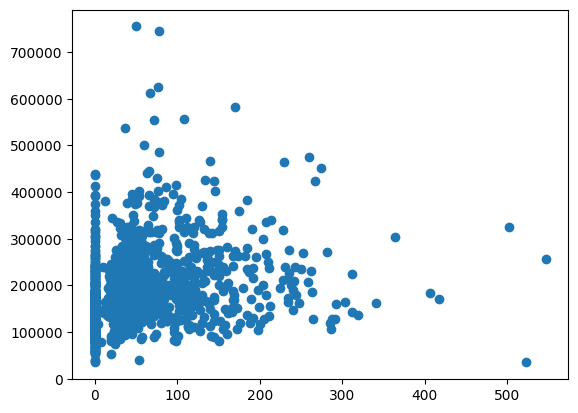

In [ ]:
plt.scatter(x='OpenPorchSF', y='SalePrice', data=df)

In [ ]:
df.query('OpenPorchSF > 500')
#drop 496

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
495    496.0        30.0  C (all)         60.0   7879.0   Pave      Reg   
583    584.0        75.0       RM         75.0  13500.0   Pave      Reg   
1328  1329.0        50.0       RM         60.0  10440.0   Pave      Reg   

     LandContour Utilities LotConfig  ... MiscVal MoSold  YrSold SaleType  \
495          Lvl    AllPub    Inside  ...     0.0   11.0  2009.0       WD   
583          Lvl    AllPub    Inside  ...     0.0    7.0  2008.0       WD   
1328         Lvl    AllPub    Corner  ...  1150.0    6.0  2008.0       WD   

     SaleCondition SalePrice  TotalSF  TotalBath  House  YearSinceRemodeled  
495        Abnorml   34900.0   1440.0        1.0   89.0                59.0  
583         Normal  325000.0   4012.0        3.5  115.0                 8.0  
1328        Normal  256000.0   4302.0        2.0   88.0                58.0  

[3 rows x 81 columns]

In [ ]:
stats.zscore(df['OpenPorchSF']).sort_values().tail(10)

807     4.006136
645     4.006136
996     4.111823
735     4.443982
875     4.791239
523     5.425361
854     5.606538
583     6.874782
495     7.191843
1328    7.554198
Name: OpenPorchSF, dtype: float64

In [ ]:
plt.scatter(x='EnclosedPorch', y='SalePrice', data=df)

In [ ]:
df.query('EnclosedPorch > 500')
#198

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
197  198.0        75.0       RL        174.0  25419.0   Pave      Reg   

    LandContour Utilities LotConfig  ... MiscVal MoSold  YrSold SaleType  \
197         Lvl    AllPub    Corner  ...     0.0    3.0  2006.0       WD   

    SaleCondition SalePrice  TotalSF  TotalBath  House  YearSinceRemodeled  
197       Abnorml  235000.0   4080.0        3.5   88.0                16.0  

[1 rows x 81 columns]

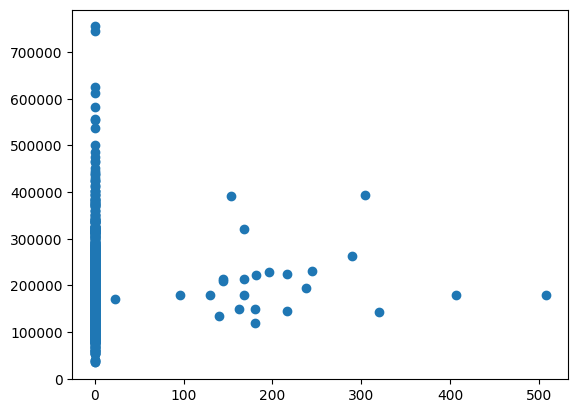

In [ ]:
plt.scatter(x='3SsnPorch', y='SalePrice', data=df)

In [ ]:
df.query('`3SsnPorch` > 500')
#drop 206


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
205  206.0        20.0       RL         99.0  11851.0   Pave      Reg   

    LandContour Utilities LotConfig  ... MiscVal MoSold  YrSold SaleType  \
205         Lvl    AllPub    Corner  ...     0.0    5.0  2009.0       WD   

    SaleCondition SalePrice  TotalSF  TotalBath  House  YearSinceRemodeled  
205        Normal  180500.0   2866.0        2.0   19.0                19.0  

[1 rows x 81 columns]

In [ ]:
stats.zscore(df['3SsnPorch']).sort_values().tail(10)

280      6.571417
1161     7.253841
1080     7.253841
237      8.004507
258      8.243356
1346     9.778810
1437    10.256507
5       10.802446
55      13.770991
205     17.217233
Name: 3SsnPorch, dtype: float64

In [ ]:
plt.scatter(x='ScreenPorch', y='SalePrice', data=df)

In [ ]:
stats.zscore(df['ScreenPorch']).sort_values().tail(10)

1282    4.896794
72      4.950617
854     5.327377
907     5.506787
359     6.439718
625     6.637069
426     6.834420
185     7.085593
1386    7.623823
1328    8.341462
Name: ScreenPorch, dtype: float64

In [ ]:
plt.scatter(x='PoolArea', y='SalePrice', data=df)

In [ ]:
stats.zscore(df['PoolArea']).sort_values().tail(10)

479     -0.068692
478     -0.068692
485     -0.068692
1298    11.882444
197     12.679187
1386    12.853474
1182    13.749810
1170    14.272672
810     16.065342
1423    18.306180
Name: PoolArea, dtype: float64

In [ ]:
df.query('PoolArea > 650 & SalePrice > 700000')


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice, TotalSF, TotalBath, House, YearSinceRemodeled]
Index: []

[0 rows x 81 columns]

In [ ]:
plt.scatter(x='MiscVal', y='SalePrice', data=df)

In [ ]:
stats.zscore(df['MiscVal']).sort_values().tail(10)

767      2.533528
1171     2.735160
539      3.944952
510      3.944952
1386     3.944952
890      3.944952
1457     4.953112
705      6.969431
1230    16.647766
346     31.165268
Name: MiscVal, dtype: float64

In [ ]:
df.query('MiscVal > 8000')
#drop 347 and 1231

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
346    347.0        20.0       RL         69.0  12772.0   Pave      IR1   
1230  1231.0        90.0       RL         69.0  18890.0   Pave      IR1   

     LandContour Utilities LotConfig  ...  MiscVal MoSold  YrSold SaleType  \
346          Lvl    AllPub   CulDSac  ...  15500.0    4.0  2007.0       WD   
1230         Lvl    AllPub    Inside  ...   8300.0    8.0  2007.0       WD   

     SaleCondition SalePrice  TotalSF  TotalBath  House  YearSinceRemodeled  
346         Normal  151500.0   1916.0        1.0   47.0                 9.0  
1230        Normal  190000.0   3981.0        3.0   30.0                30.0  

[2 rows x 81 columns]

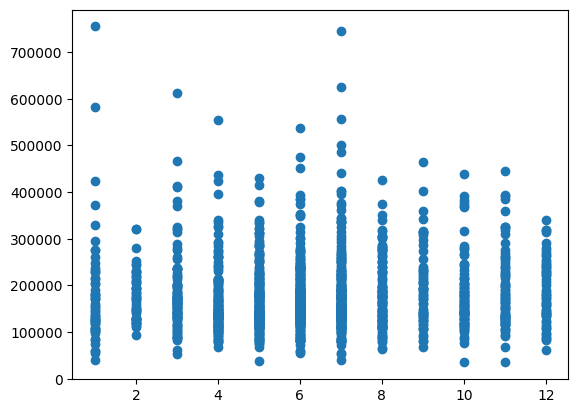

In [ ]:
plt.scatter(x='MoSold', y='SalePrice', data=df)

In [ ]:
stats.zscore(df['MoSold']).sort_values().tail(10)

1292    2.100892
252     2.100892
1419    2.100892
709     2.100892
462     2.100892
574     2.100892
707     2.100892
573     2.100892
1296    2.100892
720     2.100892
Name: MoSold, dtype: float64

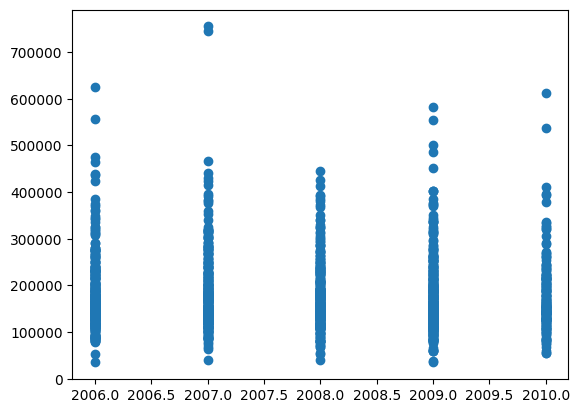

In [ ]:
plt.scatter(x='YrSold', y='SalePrice', data=df)

In [ ]:
stats.zscore(df['YrSold']).sort_values().tail(10)

344     1.64521
658     1.64521
898     1.64521
171     1.64521
503     1.64521
353     1.64521
1322    1.64521
162     1.64521
158     1.64521
1284    1.64521
Name: YrSold, dtype: float64

In [ ]:
plt.scatter(x='SalePrice', y='SalePrice', data=df)

In [62]:
stats.zscore(df['SalePrice']).sort_values().tail(10)

798     3.828970
178     4.040982
769     4.496348
440     4.710413
1046    4.730321
803     5.062146
898     5.423840
1169    5.591855
1182    7.102899
691     7.228819
Name: SalePrice, dtype: float64

In [63]:
# Assign all dropping values to a variable
drop_val = [935, 1299, 250,314,336, 707,379,186,1183,692,314,298,441,524,739,598,955,49,810,636,167,310,606,643,54,496,198,206,1231,347]

In [64]:
df = df[df.Id.isin(drop_val) == False]

In [65]:
pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).head(20)

0
Id            0
HalfBath      0
FireplaceQu   0
Fireplaces    0
Functional    0
TotRmsAbvGrd  0
KitchenQual   0
KitchenAbvGr  0
BedroomAbvGr  0
FullBath      0
HeatingQC     0
BsmtHalfBath  0
BsmtFullBath  0
GrLivArea     0
LowQualFinSF  0
2ndFlrSF      0
1stFlrSF      0
Electrical    0
GarageType    0
GarageYrBlt   0

In [66]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [67]:
df['FireplaceQu'].unique()

array(['Gd', 'TA', 'Fa', 'Ex', 'Po'], dtype=object)

In [ ]:
sns.catplot(data=df, x='FireplaceQu', y='SalePrice', kind='box')

In [ ]:
df['MasVnrType'].unique()

array(['BrkFace', 'Stone', 'BrkCmn'], dtype=object)

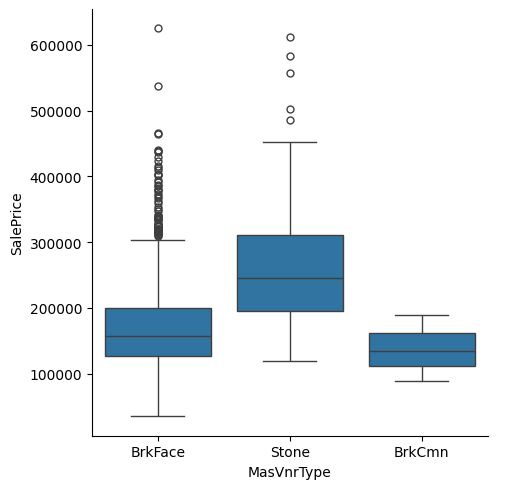

In [ ]:
sns.catplot(data=df, x='MasVnrType', y='SalePrice', kind='box')

In [ ]:
# df['MasVnrArea'].unique()
# df['GarageYrBlt'].corr(df['YearBuilt'])
# df['GarageType'].unique()
# df['GarageFinish'].unique()
# df['GarageQual'].unique()
# df['BsmtFinType2'].unique()
# df['BsmtQual'].unique()
# df['BsmtCond'].unique()
# df['BsmtFinType1'].unique()
# df['Electrical'].unique()

#






array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [ ]:
df['BsmtFinType2'].fillna('Unf', inplace=True)

In [ ]:
sns.catplot(data=df, x='BsmtFinType2', y='SalePrice', kind='box')

In [68]:
#Perform Feature Engineering
# total square footage of house (including basement)
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# total number of bathrooms (which includes full and half)
df['TotalBath'] = df["FullBath"] + (0.5 * df["HalfBath"]) + df["BsmtFullBath"] + (0.5 * df["BsmtHalfBath"])

#Age of the house at the time of sale
df['House'] = df["YrSold"] - df["YearBuilt"]

# Number of years since the house was remodeled
df['YearSinceRemodeled'] = df["YrSold"] - df["YearRemodAdd"]

# Number of years since the house was built
df['YearSinceBuilt'] = df["YrSold"] - df["YearBuilt"]

In [69]:
df["YearSinceRemodeled"].head()

0     5.0
1    31.0
2     6.0
3    36.0
4     8.0
Name: YearSinceRemodeled, dtype: float64

In [70]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix'
# plt.show()

<Axes: >

In [71]:
df = df.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

<Axes: >

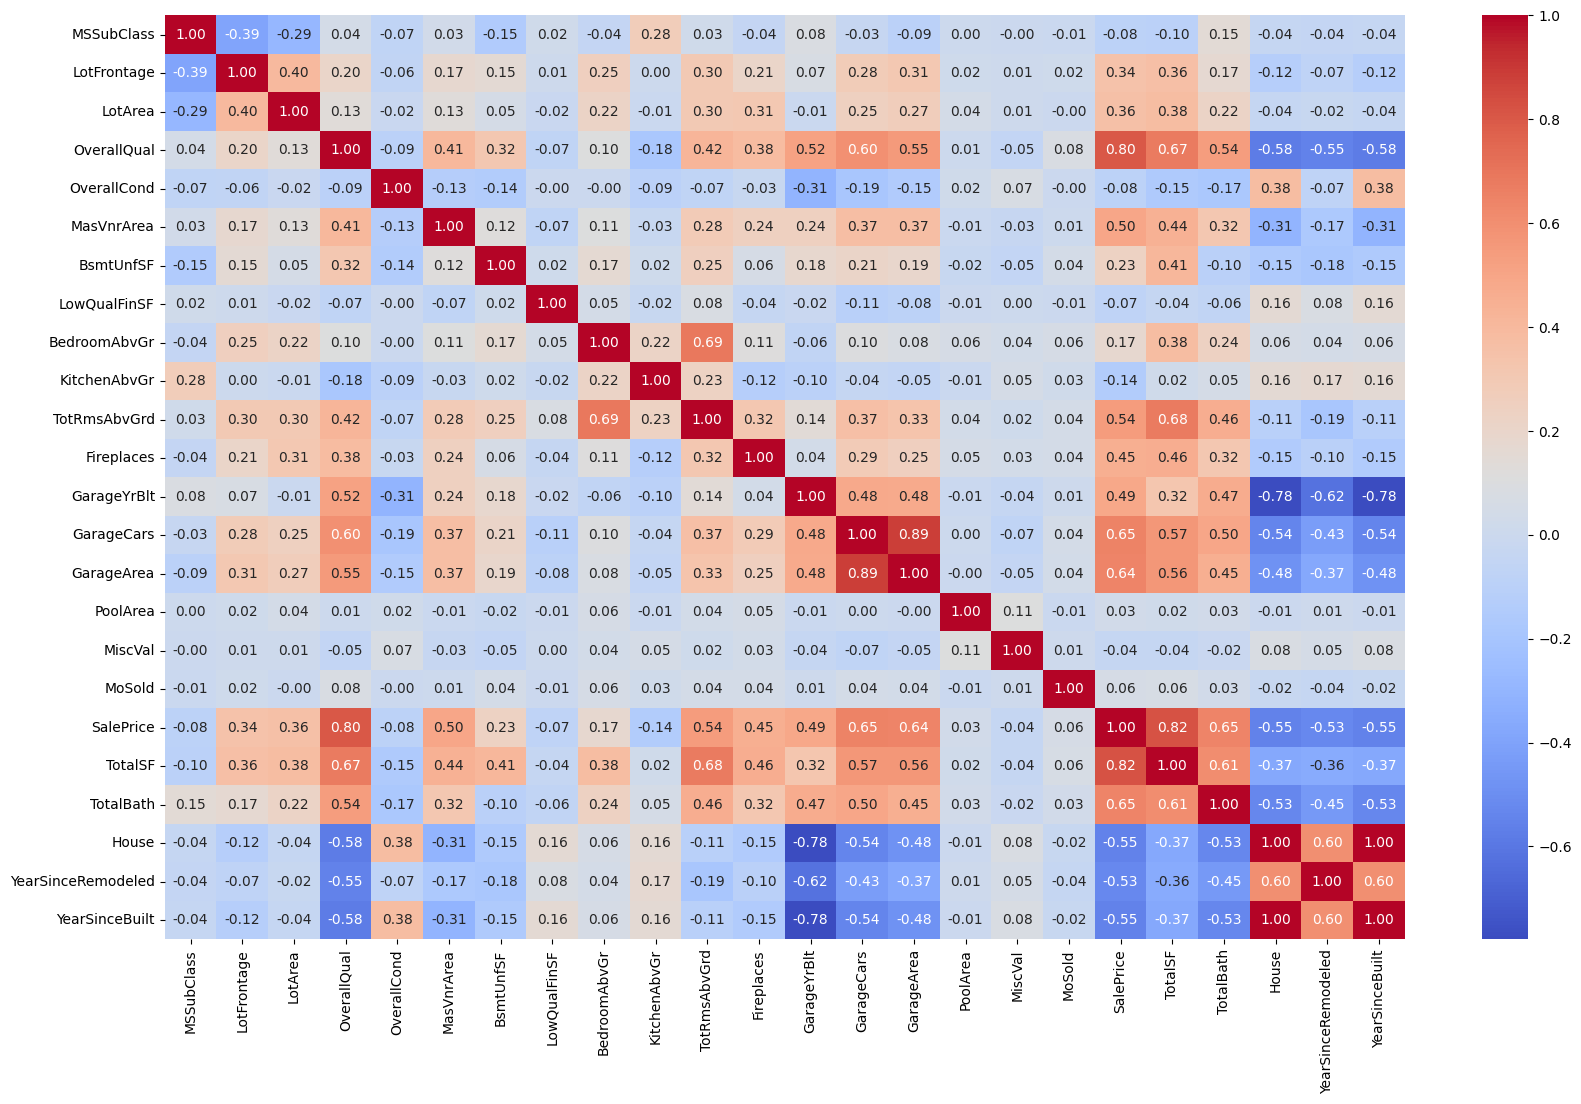

In [72]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

<Axes: xlabel='SalePrice', ylabel='Count'>

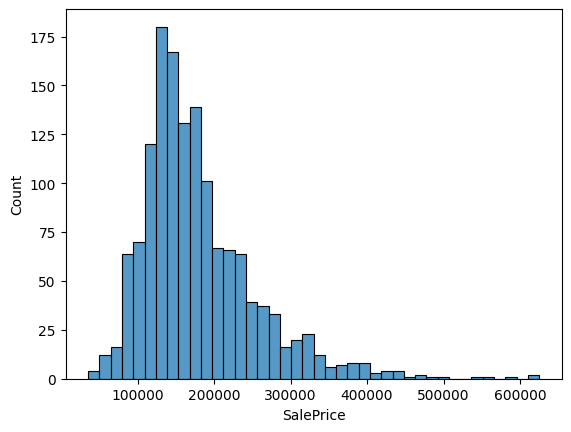

In [73]:
sns.histplot(df['SalePrice'])

In [74]:
df['SalePrice'] = np.log(df['SalePrice'])

In [75]:
sns.histplot(df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

In [76]:
df.dtypes[df.dtypes == 'object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [77]:
df.dtypes[df.dtypes != 'object']

MSSubClass            float64
LotFrontage           float64
LotArea               float64
OverallQual           float64
OverallCond           float64
MasVnrArea            float64
BsmtUnfSF             float64
LowQualFinSF          float64
BedroomAbvGr          float64
KitchenAbvGr          float64
TotRmsAbvGrd          float64
Fireplaces            float64
GarageYrBlt           float64
GarageCars            float64
GarageArea            float64
PoolArea              float64
MiscVal               float64
MoSold                float64
SalePrice             float64
TotalSF               float64
TotalBath             float64
House                 float64
YearSinceRemodeled    float64
YearSinceBuilt        float64
dtype: object

In [78]:
ode_cols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional', \
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']

In [79]:
ohe_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', \
           'MasVnrType','Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [80]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')

In [81]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [82]:
ode_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [83]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [84]:
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe_p', ohe_pipeline, ohe_cols),
    ],
    remainder='passthrough',
    n_jobs=-1)

In [85]:
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

In [86]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [87]:
X_preprocessed = pipeline.fit_transform(X)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

In [90]:
#using Z Score Test
# z score = (x - mean)/std.deviation
import pandas as pd
from scipy.stats import zscore

final_df = pd.DataFrame({"data": [1, 2, 3, 4, 5]})
z_scores = zscore(final_df["data"])
print(z_scores)

0   -1.414214
1   -0.707107
2    0.000000
3    0.707107
4    1.414214
Name: data, dtype: float64


Perform Feature scaling
> Do this by Standardizing or Normalizing

In [93]:
# df.drop(columns=['Id'], inplace=True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1431 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          1431 non-null   float64
 1   MSZoning            1431 non-null   object 
 2   LotFrontage         1431 non-null   float64
 3   LotArea             1431 non-null   float64
 4   Street              1431 non-null   object 
 5   LotShape            1431 non-null   object 
 6   LandContour         1431 non-null   object 
 7   Utilities           1431 non-null   object 
 8   LotConfig           1431 non-null   object 
 9   LandSlope           1431 non-null   object 
 10  Neighborhood        1431 non-null   object 
 11  Condition1          1431 non-null   object 
 12  Condition2          1431 non-null   object 
 13  BldgType            1431 non-null   object 
 14  HouseStyle          1431 non-null   object 
 15  OverallQual         1431 non-null   float64
 16  OverallCond

In [94]:
df.describe().round(3)

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count    1431.000     1431.000   1431.000     1431.000     1431.000   
mean       56.719       69.242   9957.617        6.077        5.577   
std        42.097       19.646   5281.310        1.360        1.109   
min        20.000       21.000   1300.000        1.000        1.000   
25%        20.000       60.000   7500.000        5.000        5.000   
50%        50.000       69.000   9416.000        6.000        5.000   
75%        70.000       78.000  11475.000        7.000        6.000   
max       190.000      182.000  70761.000       10.000        9.000   

       MasVnrArea  BsmtUnfSF  LowQualFinSF  BedroomAbvGr  KitchenAbvGr  ...  \
count    1431.000   1431.000      1431.000      1431.000      1431.000  ...   
mean      100.874    567.774         4.929         2.863         1.044  ...   
std       173.143    442.805        43.600         0.800         0.205  ...   
min         0.000      0.000         0.000         0.000         1.000  ...   
25%         0.000    223.000         0.000         2.000         1.000  ...   
50%         0.000    480.000         0.000         3.000         1.000  ...   
75%       162.500    808.000         0.000         3.000         1.000  ...   
max      1378.000   2336.000       528.000         6.000         2.000  ...   

       GarageArea  PoolArea   MiscVal    MoSold  SalePrice   TotalSF  \
count    1431.000  1431.000  1431.000  1431.000   1431.000  1431.000   
mean      471.610     1.734    26.900     6.314     12.017  2538.134   
std       210.575    33.044   188.778     2.692      0.391   748.173   
min         0.000     0.000     0.000     1.000     10.472   334.000   
25%       333.000     0.000     0.000     5.000     11.775  2005.500   
50%       478.000     0.000     0.000     6.000     11.995  2464.000   
75%       576.000     0.000     0.000     8.000     12.269  2988.000   
max      1390.000   738.000  3500.000    12.000     13.346  6428.000   

       TotalBath     House  YearSinceRemodeled  YearSinceBuilt  
count   1431.000  1431.000            1431.000        1431.000  
mean       2.196    36.484              23.100          36.484  
std        0.771    30.163              20.703          30.163  
min        1.000     0.000               0.000           0.000  
25%        2.000     7.500               4.000           7.500  
50%        2.000    35.000              14.000          35.000  
75%        2.500    54.000              41.000          54.000  
max        5.000   136.000              60.000         136.000  

[8 rows x 24 columns]

In [95]:
num_columns = df.shape[1]
num_columns

63

In [97]:
X1 = df.iloc[:,0:62]

In [98]:
X2 = df.iloc[:,0:62]

In [99]:
scaleStandard = StandardScaler()

In [100]:


# Assuming 'df' is your original DataFrame
X1 = df.iloc[:,0:62]

# Identify columns with string values (categorical features)
categorical_cols = X1.select_dtypes(include=['object']).columns

# Handle categorical features (example using one-hot encoding)
X1_encoded = pd.get_dummies(X1, columns=categorical_cols)

# Now apply StandardScaler
scaleStandard = StandardScaler()
X1_scaled = scaleStandard.fit_transform(X1_encoded)

In [102]:
X1 = pd.DataFrame(X1_scaled, columns=X1_encoded.columns)

In [ ]:
X1.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.073375    -0.220875 -0.207142     0.651479    -0.517200   1.050994   
1   -0.872563     0.460320 -0.091886    -0.071836     2.179628   0.156734   
2    0.073375    -0.084636  0.073480     0.651479    -0.517200   0.984752   
3    0.309859    -0.447940 -0.096897     0.651479    -0.517200  -1.863632   
4    0.073375     0.641972  0.375148     1.374795    -0.517200   0.951632   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0      0.878668    0.514104    0.575425   -0.288653  ...       -0.058621   
1     -0.429577   -0.570750    1.171992   -0.288653  ...       -0.058621   
2      0.830215    0.325915    0.092907   -0.288653  ...       -0.058621   
3     -0.720298   -0.570750   -0.499274   -0.288653  ...       -0.058621   
4      0.733308    1.366489    0.463568   -0.288653  ...       -0.058621   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0     -0.301962     -0.045376     0.390293              -0.272616   
1     -0.301962     -0.045376     0.390293              -0.272616   
2     -0.301962     -0.045376     0.390293              -0.272616   
3     -0.301962     -0.045376     0.390293               3.668167   
4     -0.301962     -0.045376     0.390293              -0.272616   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0              -0.052414             -0.091035             -0.117851   
1              -0.052414             -0.091035             -0.117851   
2              -0.052414             -0.091035             -0.117851   
3              -0.052414             -0.091035             -0.117851   
4              -0.052414             -0.091035             -0.117851   

   SaleCondition_Normal  SaleCondition_Partial  
0              0.467651              -0.305995  
1              0.467651              -0.305995  
2              0.467651              -0.305995  
3             -2.138345              -0.305995  
4              0.467651              -0.305995  

[5 rows x 279 columns]

In [103]:
X1.describe().round(3)

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
count    1431.000     1431.000  1431.000     1431.000     1431.000   
mean       -0.000        0.000    -0.000        0.000       -0.000   
std         1.000        1.000     1.000        1.000        1.000   
min        -0.873       -2.456    -1.640       -3.734       -4.128   
25%        -0.873       -0.471    -0.466       -0.792       -0.521   
50%        -0.160       -0.012    -0.103       -0.057       -0.521   
75%         0.316        0.446     0.287        0.679        0.381   
max         3.167        5.742    11.517        2.885        3.087   

       MasVnrArea  BsmtUnfSF  LowQualFinSF  BedroomAbvGr  KitchenAbvGr  ...  \
count    1431.000   1431.000      1431.000      1431.000      1431.000  ...   
mean       -0.000     -0.000        -0.000        -0.000        -0.000  ...   
std         1.000      1.000         1.000         1.000         1.000  ...   
min        -0.583     -1.283        -0.113        -3.580        -0.215  ...   
25%        -0.583     -0.779        -0.113        -1.079        -0.215  ...   
50%        -0.583     -0.198        -0.113         0.171        -0.215  ...   
75%         0.356      0.543        -0.113         0.171        -0.215  ...   
max         7.379      3.995        12.001         3.923         4.660  ...   

       SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
count        1431.000      1431.000      1431.000     1431.000   
mean           -0.000         0.000         0.000       -0.000   
std             1.000         1.000         1.000        1.000   
min            -0.059        -0.298        -0.046       -2.579   
25%            -0.059        -0.298        -0.046        0.388   
50%            -0.059        -0.298        -0.046        0.388   
75%            -0.059        -0.298        -0.046        0.388   
max            16.888         3.351        21.817        0.388   

       SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
count               1431.000               1431.000              1431.000   
mean                  -0.000                  0.000                -0.000   
std                    1.000                  1.000                 1.000   
min                   -0.270                 -0.046                -0.088   
25%                   -0.270                 -0.046                -0.088   
50%                   -0.270                 -0.046                -0.088   
75%                   -0.270                 -0.046                -0.088   
max                    3.708                 21.817                11.362   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count              1431.000              1431.000               1431.000  
mean                  0.000                 0.000                 -0.000  
std                   1.000                 1.000                  1.000  
min                  -0.119                -2.168                 -0.303  
25%                  -0.119                 0.461                 -0.303  
50%                  -0.119                 0.461                 -0.303  
75%                  -0.119                 0.461                 -0.303  
max                   8.399                 0.461                  3.305  

[8 rows x 259 columns]

# **Using Normalization**:

In [104]:
scaleMinMax = MinMaxScaler(feature_range=(0,1))

In [105]:
# X2 = scaleMinMax.fit_transform(X2)
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler

# Assuming X2 is your DataFrame
# Identify columns with non-numerical data
categorical_cols = X2.select_dtypes(include=['object']).columns

# One-hot encode categorical features
X2_encoded = pd.get_dummies(X2, columns=categorical_cols)

# Now apply MinMaxScaler
scaleMinMax = MinMaxScaler(feature_range=(0,1))
X2_scaled = scaleMinMax.fit_transform(X2_encoded)

In [106]:
X2 = pd.DataFrame(X2_scaled, columns=X2_encoded.columns)

In [107]:
X2.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0    0.235294     0.273292  0.102935     0.666667        0.500    0.142235   
1    0.000000     0.366460  0.119492     0.555556        0.875    0.000000   
2    0.235294     0.291925  0.143246     0.666667        0.500    0.117562   
3    0.294118     0.242236  0.118772     0.666667        0.500    0.000000   
4    0.235294     0.391304  0.186580     0.777778        0.500    0.253991   

   BsmtUnfSF  LowQualFinSF  BedroomAbvGr  KitchenAbvGr  ...  SaleType_ConLw  \
0   0.064212           0.0      0.500000           0.0  ...             0.0   
1   0.121575           0.0      0.500000           0.0  ...             0.0   
2   0.185788           0.0      0.500000           0.0  ...             0.0   
3   0.231164           0.0      0.500000           0.0  ...             0.0   
4   0.209760           0.0      0.666667           0.0  ...             0.0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0           0.0           0.0          1.0                    0.0   
1           0.0           0.0          1.0                    0.0   
2           0.0           0.0          1.0                    0.0   
3           0.0           0.0          1.0                    1.0   
4           0.0           0.0          1.0                    0.0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                    0.0                   0.0                   0.0   
1                    0.0                   0.0                   0.0   
2                    0.0                   0.0                   0.0   
3                    0.0                   0.0                   0.0   
4                    0.0                   0.0                   0.0   

   SaleCondition_Normal  SaleCondition_Partial  
0                   1.0                    0.0  
1                   1.0                    0.0  
2                   1.0                    0.0  
3                   0.0                    0.0  
4                   1.0                    0.0  

[5 rows x 259 columns]

In [108]:
X2.describe().round(3)

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
count    1431.000     1431.000  1431.000     1431.000     1431.000   
mean        0.216        0.300     0.125        0.564        0.572   
std         0.248        0.122     0.076        0.151        0.139   
min         0.000        0.000     0.000        0.000        0.000   
25%         0.000        0.242     0.089        0.444        0.500   
50%         0.176        0.298     0.117        0.556        0.500   
75%         0.294        0.354     0.146        0.667        0.625   
max         1.000        1.000     1.000        1.000        1.000   

       MasVnrArea  BsmtUnfSF  LowQualFinSF  BedroomAbvGr  KitchenAbvGr  ...  \
count    1431.000   1431.000      1431.000      1431.000      1431.000  ...   
mean        0.073      0.243         0.009         0.477         0.044  ...   
std         0.126      0.190         0.083         0.133         0.205  ...   
min         0.000      0.000         0.000         0.000         0.000  ...   
25%         0.000      0.095         0.000         0.333         0.000  ...   
50%         0.000      0.205         0.000         0.500         0.000  ...   
75%         0.118      0.346         0.000         0.500         0.000  ...   
max         1.000      1.000         1.000         1.000         1.000  ...   

       SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
count        1431.000      1431.000      1431.000     1431.000   
mean            0.003         0.082         0.002        0.869   
std             0.059         0.274         0.046        0.337   
min             0.000         0.000         0.000        0.000   
25%             0.000         0.000         0.000        1.000   
50%             0.000         0.000         0.000        1.000   
75%             0.000         0.000         0.000        1.000   
max             1.000         1.000         1.000        1.000   

       SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
count               1431.000               1431.000              1431.000   
mean                   0.068                  0.002                 0.008   
std                    0.251                  0.046                 0.087   
min                    0.000                  0.000                 0.000   
25%                    0.000                  0.000                 0.000   
50%                    0.000                  0.000                 0.000   
75%                    0.000                  0.000                 0.000   
max                    1.000                  1.000                 1.000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count              1431.000              1431.000               1431.000  
mean                  0.014                 0.825                  0.084  
std                   0.117                 0.380                  0.277  
min                   0.000                 0.000                  0.000  
25%                   0.000                 1.000                  0.000  
50%                   0.000                 1.000                  0.000  
75%                   0.000                 1.000                  0.000  
max                   1.000                 1.000                  1.000  

[8 rows x 259 columns]

Feature Selection
> Select features that are most relevant for the prediction

In [110]:
X = df.iloc[:,0:62]
y = df['SalePrice']

In [118]:
#Here i use f_regression for regression task
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)


In [120]:
#To get the scores for the featutres
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [121]:
#Join the two DataFrame toghter
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

In [122]:
featuresScores

Specs         Score
0           MSSubClass  7.732658e+00
1             MSZoning  6.490967e+01
2          LotFrontage  1.945715e+02
3              LotArea  2.017564e+02
4               Street  7.748083e+00
..                 ...           ...
57           SalePrice -2.521804e+15
58             TotalSF  2.971829e+03
59           TotalBath  1.225893e+03
60               House  8.124002e+02
61  YearSinceRemodeled  7.008399e+02

[62 rows x 2 columns]

In [123]:
print(featuresScores.nlargest(10, 'Score'))

                 Specs        Score
58             TotalSF  2971.829319
15         OverallQual  2908.909204
47          GarageCars  1244.579938
59           TotalBath  1225.893473
48          GarageArea  1079.002795
60               House   812.400161
23           ExterQual   749.434187
26            BsmtQual   713.285612
46        GarageFinish   710.770578
61  YearSinceRemodeled   700.839864


Train model